## &#x1F310; &nbsp; Code Library, Style, and Links
Useful `LINKS`:

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)

&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

&#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #37c9e1; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #37c9e1;}      
div.output_stderr pre {background-color: gainsboro;}  
div.output_stderr {background-color: slategrey;}               
</style>

In [4]:
import numpy as np 
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
from descartes import PolygonPatch

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ReduceLROnPlateau

In [3]:
# Dataframe style
style_dict = {'background-color':'slategray',
              'color':'#37c9e1',
              'border-color': 'white',
              'font-family':'Roboto'}
# Function for fitting regressors
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train)
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg
# Function for regressor metrics
def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    print("_______________________________________")
    print(regressor)
    print("_______________________________________")
    print("EV score. Train: ", explained_variance_score(y_train, y_train_reg))
    print("EV score. Test: ", explained_variance_score(y_test, y_test_reg))
    print("---------")
    print("R2 score. Train: ", r2_score(y_train, y_train_reg))
    print("R2 score. Test: ", r2_score(y_test, y_test_reg))
    print("---------")
    print("MSE score. Train: ", mean_squared_error(y_train, y_train_reg))
    print("MSE score. Test: ", mean_squared_error(y_test, y_test_reg))
    print("---------")
    print("MAE score. Train: ", mean_absolute_error(y_train, y_train_reg))
    print("MAE score. Test: ", mean_absolute_error(y_test, y_test_reg))
    print("---------")
    print("MdAE score. Train: ", median_absolute_error(y_train, y_train_reg))
    print("MdAE score. Test: ", median_absolute_error(y_test, y_test_reg))
# Function for neural networks' metrics    
def nn_scores(regressor, y_train, y_valid, y_test, y_train_reg, y_valid_reg, y_test_reg):
    print("_______________________________________")
    print(regressor)
    print("_______________________________________")
    print("EV score. Train: ", explained_variance_score(y_train, y_train_reg))
    print("EV score. Valid: ", explained_variance_score(y_valid, y_valid_reg))
    print("EV score. Test: ", explained_variance_score(y_test, y_test_reg))
    print("---------")
    print("R2 score. Train: ", r2_score(y_train, y_train_reg))
    print("R2 score. Valid: ", r2_score(y_valid, y_valid_reg))
    print("R2 score. Test: ", r2_score(y_test, y_test_reg))
    print("---------")
    print("MSE score. Train: ", mean_squared_error(y_train, y_train_reg))
    print("MSE score. Valid: ", mean_squared_error(y_valid, y_valid_reg))
    print("MSE score. Test: ", mean_squared_error(y_test, y_test_reg))
    print("---------")
    print("MAE score. Train: ", mean_absolute_error(y_train, y_train_reg))
    print("MAE score. Valid: ", mean_absolute_error(y_valid, y_valid_reg))
    print("MAE score. Test: ", mean_absolute_error(y_test, y_test_reg))
    print("---------")
    print("MdAE score. Train: ", median_absolute_error(y_train, y_train_reg))
    print("MdAE score. Valid: ", median_absolute_error(y_valid, y_valid_reg))
    print("MdAE score. Test: ", median_absolute_error(y_test, y_test_reg))
# Functions for neural networks' fitting    
def loss_plot(fit_history, n):
    plt.figure(figsize=(14, 3.5))

    plt.plot(fit_history.history['loss'][n:], 
             color='#3636ff', label = 'train')
    plt.plot(fit_history.history['val_loss'][n:], 
             color='#ff3636', label = 'valid')
    plt.legend()
    plt.title('Loss Function');  
    
def mae_plot(fit_history, n):
    plt.figure(figsize=(14, 3.5))

    plt.plot(fit_history.history['mean_absolute_error'][n:], 
             color='#3636ff', label = 'train')
    plt.plot(fit_history.history['val_mean_absolute_error'][n:], 
             color='#ff3636', label = 'valid')
    plt.legend()
    plt.title('Mean Absolute Error');

## &#x1F310; &nbsp; Data

The series of notebooks `PASSNYC` 

&#x1F4D8; &nbsp; [PASSNYC. Data Exploration](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration); &nbsp; [PASSNYC. Data Exploration R](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration-r)

&#x1F4D8; &nbsp; [PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables)

&#x1F4D8; &nbsp; [PASSNYC. Comparing All Districts with 5th District](passnyc-comparing-all-districts-with-5th-district)

&#x1F4D8; &nbsp; [PASSNYC. Regression Methods](https://www.kaggle.com/olgabelitskaya/passnyc-regression-methods)

&#x1F4D8; &nbsp; [PASSNYC. Neural Networks](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks)

&#x1F4D8; &nbsp; [PASSNYC. Neural Networks 2](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks-2)

&#x1F4D8; &nbsp; [PASSNYC. 32 School Districts and D5. Part 2](https://lww.kaggle.com/olgabelitskaya/passnyc-32-school-districts-and-d5-part-2)

were used for exploration the following `KAGGLE` databases:

&#x1F4C2; &nbsp; [PASSNYC: Data Science for Good Challenge](https://www.kaggle.com/passnyc/data-science-for-good)

&#x1F4C2; &nbsp; [NY 2010 - 2016 School Safety Report](https://www.kaggle.com/new-york-city/ny-2010-2016-school-safety-report)

&#x1F4C2; &nbsp; [NYC High School Directory](https://www.kaggle.com/new-york-city/nyc-high-school-directory)

&#x1F4C2; &nbsp; [AP (College Board) NY School Level Results](https://www.kaggle.com/new-york-city/ap-college-board-ny-school-level-results)

&#x1F4C2; &nbsp; [New York City SAT Results](https://www.kaggle.com/new-york-city/new-york-city-sat-results)

&#x1F4C2; &nbsp; [NY School Districts](https://www.kaggle.com/olgabelitskaya/ny-school-districts)

The main goal of these notebooks is to find a way for effective visualization of public data to identify students within New York City’s under-performing school districts and methods for increasing the diversity of students taking the Specialized High School Admissions Test (SHSAT). 

It could help to improve the chances of students taking the SHSAT and receiving placements in specialized high schools.

Visualization allows different categories of people (analysts, educators, parents, students, investors) to detect the problems and find the decisions immediately in many practical cases.  

In [67]:
school_explorer = pd.read_csv('2016 School Explorer.csv')
d5_shsat = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
high_school = pd.read_csv('2016-doe-high-school-directory.csv')
safety = pd.read_csv('2010-2016-school-safety-report.csv')
sat_2010 = pd.read_csv('2010-sat-college-board-school-level-results.csv')
ap_2010 = pd.read_csv('2010-ap-college-board-school-level-results.csv')
sat_2012 = pd.read_csv('2012-sat-results.csv')

school_explorer.shape, d5_shsat.shape, sat_2010.shape, sat_2012.shape, high_school.shape, safety.shape

((1272, 161), (140, 7), (460, 6), (478, 6), (437, 67), (6310, 34))

In [68]:
school_explorer.iloc[:3,:10].style.set_properties(**style_dict)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full)
0,nan,nan,nan,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.7218,-73.9788,"333 E 4TH ST NEW YORK, NY 10009"
1,nan,nan,nan,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.7299,-73.9842,"185 1ST AVE NEW YORK, NY 10003"
2,nan,nan,nan,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.7213,-73.9863,"166 ESSEX ST NEW YORK, NY 10002"


In [69]:
d5_shsat.head(3).style.set_properties(**style_dict)

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10


In [70]:
high_school.iloc[:3,:10].style.set_properties(**style_dict)

,dbn,school_name,borough,building_code,shared_space,phone_number,fax_number,school_email,grade_span_min,grade_span_max
0,01M292,Henry Street School for International Studies,Manhattan,M056,Yes,212-406-9411,212-406-9417,cloughl@schools.nyc.gov,6,12
1,01M448,University Neighborhood High School,Manhattan,M446,No,212-962-4341,212-267-5611,ransonunhs@gmail.com,9,12
2,01M450,East Side Community School,Manhattan,M060,Yes,212-460-8467,212-260-9657,tomm@eschs.org,6,12


In [71]:
safety.iloc[:3,:10].style.set_properties(**style_dict)

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name
0,2013-14,K001,15K001,P.S. 001 The Bergen,K001,309 47 STREET,K,15,"1,277",nan
1,2013-14,K002,17K002,Parkside Preparatory Academy,K002,655 PARKSIDE AVENUE,K,17,479,655 PARKSIDE AVENUE CONSOLIDATED LOCATION
2,2013-14,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17,397,655 PARKSIDE AVENUE CONSOLIDATED LOCATION


In [72]:
sat_2010.head(3).style.set_properties(**style_dict)

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31,391,425,385
1,01M448,University Neighborhood High School,60,394,419,387
2,01M450,East Side Community High School,69,418,431,402


In [73]:
ap_2010.head(3).style.set_properties(**style_dict)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,nan
2,01M515,LOWER EASTSIDE PREP,24,26,24


In [74]:
sat_2012.head(3).style.set_properties(**style_dict)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370


In [75]:
school_explorer.columns[:50]

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name',
       'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)', 'City', 'Zip', 'Grades', 'Grade Low', 'Grade High',
       'Community School?', 'Economic Need Index', 'School Income Estimate',
       'Percent ELL', 'Percent Asian', 'Percent Black', 'Percent Hispanic',
       'Percent Black / Hispanic', 'Percent White', 'Student Attendance Rate',
       'Percent of Students Chronically Absent', 'Rigorous Instruction %',
       'Rigorous Instruction Rating', 'Collaborative Teachers %',
       'Collaborative Teachers Rating', 'Supportive Environment %',
       'Supportive Environment Rating', 'Effective School Leadership %',
       'Effective School Leadership Rating', 'Strong Family-Community Ties %',
       'Strong Family-Community Ties Rating', 'Trust %', 'Trust Rating',
       'Student Achievement Rating', 'Average ELA Proficiency',
       'Average Math Proficiency', 'Grad

## &#x1F310; &nbsp; Findings-1

[PASSNYC. Data Exploration](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration) is the first look at the main dataset 

- finding the groups of the variables and the best ways to present them.

Here are the following parts of features with charactericrics of the school education process:

- identification variables 
  - `School Name`, `SED Code`, `Location Code`;
- administrative affiliation variables 
  - `Address (Full)`, `City`, `Zip`, `District`;
- geographic variables 
  - `Latitude`, `Longitude`;
- demographic variables 
  - `Percent Asian`, `Percent Black`, etc.;
- education indicators 
  - `Average Math Proficiency`, `Average ELA Proficiency`, 
  - `Grade 3 ELA 4s - All Students`, `Grade 3 Math 4s - All Students`, etc.;
- social environment variables 
  - `Rigorous Instruction %`, `Rigorous Instruction Rating`, 
  - `Collaborative Teachers %`, `Collaborative Teachers Rating`, etc.; 
- economic indicators 
  - `Economic Need Index`, `School Income Estimate`;
- student discipline indicators 
  - `Student Attendance Rate`, `Percent of Students Chronically Absent`;
- school types indicators 
  - `Community School?`, `Grades`, `Grade Low`, `Grade High`;
- biases in learning outcomes
  - `Grade 3 ELA 4s - American Indian or Alaska Native`,
  - `Grade 3 Math 4s - Limited English Proficient`, etc.;
- SHSAT results 
  - `Number of students who registered for the SHSAT`,
  - `Number of students who took the SHSAT`.
  
The dataset consists from two files:

- 2016 School Explorer.csv 
  - 1272 schools and 161 variables
  
- D5 SHSAT Registrations and Testers.csv
  - 28 schools and 7 variables
  
There are 21 intersections in two files so it is possible to analyze these schools using merged information.

In [76]:
print('Schools in the 5th District in both files: \n',
      set(d5_shsat['DBN']).intersection(set(school_explorer['Location Code'])))

Schools in the 5th District in both files: 
 {'05M499', '84M284', '05M514', '05M302', '05M129', '84M065', '84M726', '84M350', '05M046', '84M336', '84M384', '05M161', '84M341', '84M388', '05M670', '84M709', '05M286', '05M362', '84M481', '05M123', '05M148'}


The tasks of financial support are easily seen in the two graphs.

In the first one, we can see that most schools have indicators `Average ELA Proficiency` & `Average Math Proficiency` below the mean, hence, in the long term, it is necessary to change this trend and increase their number in the interval from 2.5 to 3.5. Of course, the higher levels will lead to increasing the number of successful students in SHSAT in general.

In the second one, we can find the tasks for the short term - organizations like PASSNYC could pay attention at three groups of schools:

- in the left top corner: the economically disadvantaged students differ from the environment with low  `Economic Need Index` and may need help to participate in learning programs;

- in the right top corner: the schools with high results and high `Economic Need Index` can increase the number of advanced courses and successful students by additional finance;

- in the right bottom corner: it seems like the schools here have no chance to overcome the situation without investments.

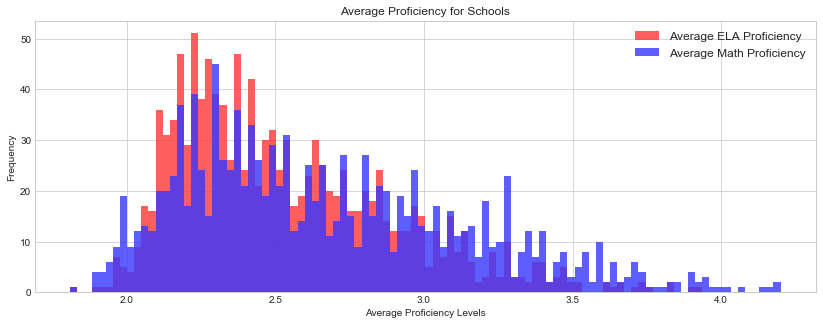

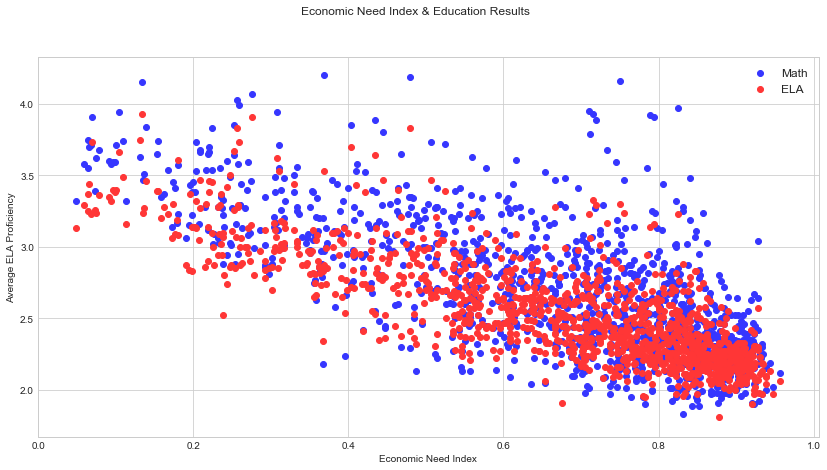

In [77]:
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(1, figsize=(14,7))
school_explorer[['Average ELA Proficiency','Average Math Proficiency']]\
.plot.hist(bins=100,alpha=0.8,figsize=(14,5),ax=ax,
           color=['#ff3636','#3636ff'],
           title='Average Proficiency for Schools')
ax.set_xlabel('Average Proficiency Levels')
ax.legend(fontsize=12)

fig,ax = plt.subplots(1, figsize=(14,7))
ax.scatter(school_explorer['Economic Need Index'],
           school_explorer['Average Math Proficiency'],
           label='Math',color='#3636ff')
ax.scatter(school_explorer['Economic Need Index'],
           school_explorer['Average ELA Proficiency'],
           label='ELA',color='#ff3636')
ax.set_xlabel('Economic Need Index')
ax.set_ylabel('Average ELA Proficiency')
ax.legend(fontsize=12)
plt.suptitle('Economic Need Index & Education Results');

## &#x1F310; &nbsp; Findings-2

[PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables) is the second look at the main dataset 

- dividing the variables into numeric and categorical types and preprocess them.

For filling the missing values in the numeric case was used the interpolation method, in the categorical case - the most common values.

In [78]:
# Fillna or replace values
numeric_list = list(school_explorer\
.columns[[7,8]+list(range(16,27))+[28,30,32,34,36]+list(range(41,161))])
target_list = ['Average ELA Proficiency','Average Math Proficiency']

school_explorer = school_explorer.drop(['Adjusted Grade',
                                        'New?',
                                        'Other Location Code in LCGMS'], 
                                       axis=1)
school_explorer.loc[[427,1023,712,908],'School Name'] = \
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']

percent_list = ['Percent ELL','Percent Asian','Percent Black',
                'Percent Hispanic','Percent Black / Hispanic',
                'Percent White','Student Attendance Rate',
                'Percent of Students Chronically Absent',
                'Rigorous Instruction %','Collaborative Teachers %',
                'Supportive Environment %','Effective School Leadership %',
                'Strong Family-Community Ties %','Trust %']

for el in percent_list:
    school_explorer[el] = school_explorer[el].astype('str')
    school_explorer[el] = school_explorer[el].str.replace("%", "")
    school_explorer[el] = school_explorer[el].str.replace("nan", "0")
    school_explorer[el] = school_explorer[el].astype(float)
    school_explorer[el].replace(0, np.NaN, inplace=True)
    school_explorer[el] = school_explorer[el].interpolate()
    
school_explorer['Economic Need Index'] = \
school_explorer['Economic Need Index'].interpolate()
school_explorer['Average ELA Proficiency'] = \
school_explorer['Average ELA Proficiency'].interpolate()
school_explorer['Average Math Proficiency'] = \
school_explorer['Average Math Proficiency'].interpolate()

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype('str') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate'] = \
    school_explorer['School Income Estimate'].str.replace(s, "")
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].str.replace("nan", "0")

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0, np.NaN, inplace=True)
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].interpolate()

rating_list = ['Rigorous Instruction Rating','Collaborative Teachers Rating',
               'Supportive Environment Rating','Effective School Leadership Rating',
               'Strong Family-Community Ties Rating','Strong Family-Community Ties Rating',
               'Trust Rating','Student Achievement Rating']

for el in rating_list:
    moda_value = school_explorer[el].value_counts().idxmax()
    school_explorer[el] = school_explorer[el].fillna(moda_value) 
    
category_list1 = ['District','Community School?','City','Grades']
                  
category_list2 = ['Rigorous Instruction Rating',
                  'Collaborative Teachers Rating',
                  'Supportive Environment Rating',
                  'Effective School Leadership Rating',
                  'Strong Family-Community Ties Rating',
                  'Trust Rating','Student Achievement Rating']

for feature in category_list1:
    feature_cat = pd.factorize(school_explorer[feature])
    school_explorer[feature] = feature_cat[0]
    
for feature in category_list2:
    feature_pairs = dict(zip(['Not Meeting Target', 'Meeting Target', 
                              'Approaching Target', 'Exceeding Target'],
                             ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature] = school_explorer[feature].astype(int)
    
category_list = list(category_list1+category_list2)
    
print('NaN count = ', sum(school_explorer.isna().sum()))

NaN count =  0


In [79]:
# Create a new dataframe
sat_list = ['DBN','Number of students who registered for the SHSAT',
            'Number of students who took the SHSAT']
d5_shsat_2016 = d5_shsat[sat_list][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
# Create a new variable
d5_shsat_2016['Took SHSAT %'] = \
d5_shsat_2016['Number of students who took the SHSAT']\
/ d5_shsat_2016['Number of students who registered for the SHSAT']

d5_shsat_2016['Took SHSAT %'] = \
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x: round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'}, inplace=True)
# Merge dataframes
d5_shsat_2016 = \
pd.merge(school_explorer[['Location Code']+numeric_list+category_list+target_list],
                         d5_shsat_2016, on='Location Code')

# Merge with geodata
geo_districts = gpd.GeoDataFrame.from_file("nysd.shp") # EPSG:2263
geo_districts = geo_districts.to_crs(epsg=4326).sort_values('SchoolDist')

geo_districts = geo_districts.reset_index(drop=True)

districts = school_explorer[numeric_list+target_list]\
.groupby(school_explorer['District']).mean().sort_index()
districts = districts.append(districts.loc[9]).sort_index()
districts = districts.reset_index(drop=True)
districts = pd.concat([geo_districts, districts], axis=1)

The correlation of variables with educational results also was discovered and represented. 

It cannot be proved that levels of `Economic Need Index` and `Percent Black / Hispanic` are causes of the level of `Average Math Proficiency` and `Average ELA Proficiency`, but they are correlated with educational results too strongly.

In [80]:
corr_matrix = school_explorer[numeric_list+target_list].corr(method='pearson')
corr_math = corr_matrix.iloc[-1][:-1]
corr_math30 = corr_math[abs(corr_math).argsort()[::-1]][:30]
corr_ela = corr_matrix.iloc[-2][corr_matrix.columns != 'Average ELA Proficiency']
corr_ela30 = corr_ela[abs(corr_ela).argsort()[::-1]][:30]

corr_math30.to_frame().style.bar(align='mid',color=['#3636ff','#ff3636'])\
.set_properties(**{'opacity':'0.8','font-family':'Roboto','color':'black'})

,Average Math Proficiency
Average ELA Proficiency,0.935253
Percent Black / Hispanic,-0.718155
Economic Need Index,-0.704222
Student Attendance Rate,0.679338
Grade 5 Math 4s - All Students,0.625105
Grade 3 Math 4s - All Students,0.623729
Grade 4 Math 4s - All Students,0.617929
Grade 5 ELA 4s - All Students,0.608659
Grade 4 ELA 4s - All Students,0.599617
Grade 3 ELA 4s - All Students,0.576874


In [81]:
corr_ela30.to_frame().style.bar(align='mid',color=['#3636ff','#ff3636'])\
.set_properties(**{'opacity':'0.8','font-family':'Roboto','color':'black'})

,Average ELA Proficiency
Average Math Proficiency,0.935253
Economic Need Index,-0.794865
Percent Black / Hispanic,-0.732782
Student Attendance Rate,0.637642
Percent White,0.631241
School Income Estimate,0.601464
Grade 5 ELA 4s - All Students,0.574409
Grade 4 ELA 4s - All Students,0.542865
Grade 5 Math 4s - All Students,0.540469
Grade 3 ELA 4s - All Students,0.534498


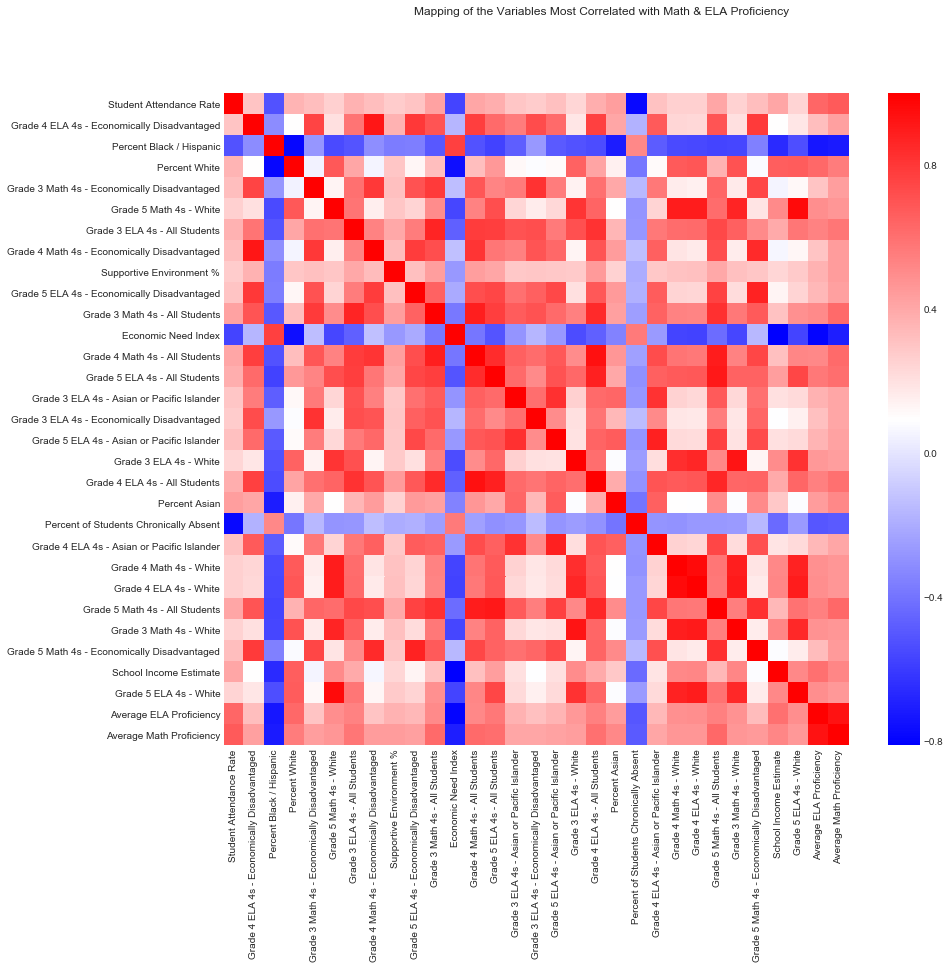

In [82]:
fig,ax = plt.subplots(1, figsize=(14,12))
corr_id = list(set(corr_math30.index).intersection(set(corr_ela.index))) + target_list
sns.heatmap(corr_matrix.loc[corr_id,corr_id], 
            ax=ax,cmap='bwr')
plt.suptitle('Mapping of the Variables Most Correlated with Math & ELA Proficiency');

It was also shown the possibility to divide schools into 10 clusters based on variables.

The principles of algorithmic clustering for schools can be represented by the next table: 

- low levels of `Economic Need Index` and student absence and high educational results correspond to the highest cluster index.

Of course, for schools in the cluster #0 it needs a lot of attention to move them ahead on the cluster scale.

It seems like the certain tendency of cluster biases in the `Percent Black / Hispanic` variable really exists.

In [83]:
X = school_explorer[numeric_list+target_list]
n = 10

clf = KMeans(n_clusters=n,random_state=23)
cluster_labels = clf.fit_predict(np.array(X))
school_explorer['Education Clusters'] = cluster_labels

indices = list(X.groupby(school_explorer['Education Clusters']).mean()\
               .sort_values('Average Math Proficiency').index)
feature_pairs = dict(zip(indices,range(10,20)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)
feature_pairs = dict(zip(range(10,20),range(0,10)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)

school_explorer[['Economic Need Index',
                 'Percent of Students Chronically Absent',
                 'Percent Black / Hispanic']+target_list]\
.groupby(school_explorer['Education Clusters']).mean()\
.sort_values('Average Math Proficiency')\
.style.background_gradient(cmap='bwr')\
.set_properties(**{'opacity':'0.8','font-family':'Roboto','color':'black'})

,Economic Need Index,Percent of Students Chronically Absent,Percent Black / Hispanic,Average ELA Proficiency,Average Math Proficiency
Education Clusters,,,,,
0,0.86004,30.3229,94.5292,2.30491,2.39197
1,0.808824,27.9698,90.171,2.38373,2.49692
2,0.749796,22.8148,82.1159,2.43736,2.58505
3,0.678411,19.0411,71.5592,2.51934,2.66065
4,0.581355,16.6678,61.1118,2.62964,2.80178
5,0.485206,15.2568,56.5676,2.71296,2.84837
6,0.359841,13.1477,39.7727,2.89705,3.07676
7,0.367054,12.2564,32.8205,2.93365,3.11609
8,0.206,6.41304,17,3.28913,3.48761


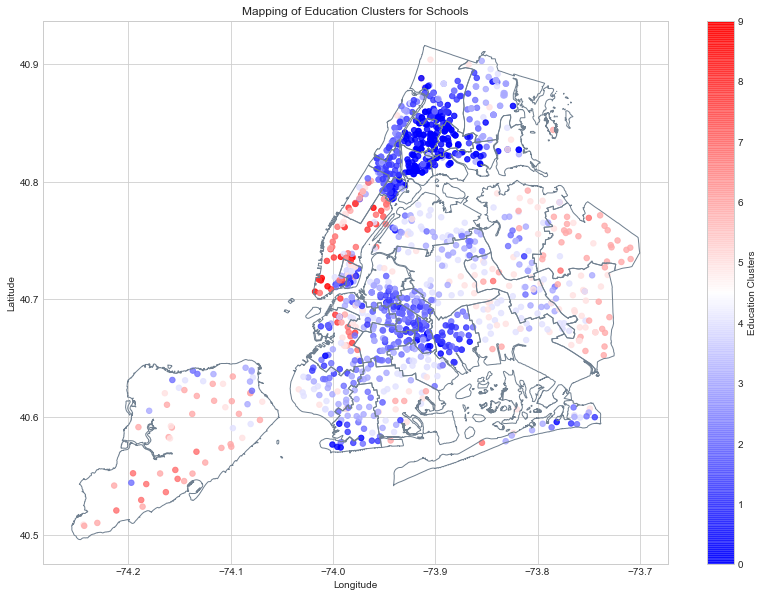

In [84]:
fig,ax = plt.subplots(1, figsize=(14,12))
school_explorer.plot(kind="scatter",x="Longitude", y="Latitude",
                     s=30, c="Education Clusters", ax=ax,
                     title='Mapping of Education Clusters for Schools',
                     cmap=cm.bwr,colorbar=True,alpha=0.8, figsize=(14,10))
districts.plot(ax=ax,facecolor='none',edgecolor='slategray');

## &#x1F310; &nbsp; Findings-3

[PASSNYC. Comparing All Districts with 5th District](passnyc-comparing-all-districts-with-5th-district) is the third look at the main dataset and adding other datasets

- data analyzing with regional and time specific.

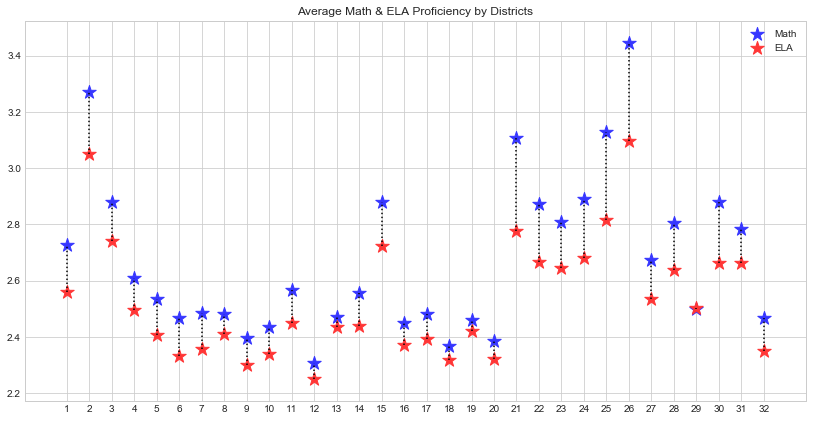

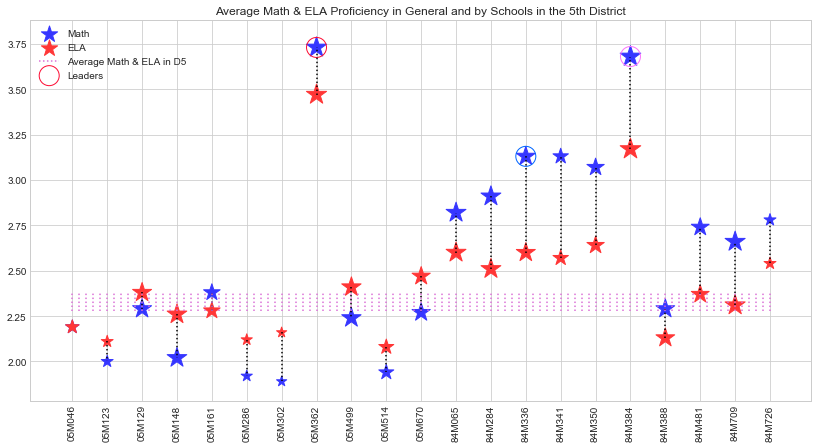

In [86]:
fig,ax = plt.subplots(1, figsize=(14,7))

ax.scatter(range(1,33),districts['Average Math Proficiency'].drop([10]),
           marker='*',s=200,label='Math',c='#3636ff')
ax.scatter(range(1,33),districts['Average ELA Proficiency'].drop([10]),
           marker='*',s=200,label='ELA',c='#ff3636')

plt.vlines(range(1,33),
           districts['Average ELA Proficiency'].drop([10]),
           districts['Average Math Proficiency'].drop([10]),
           linestyle="dotted")
ax.legend()
ax.set_xticks(list(range(1,33)))
plt.title('Average Math & ELA Proficiency by Districts')

fig,ax = plt.subplots(1, figsize=(14,7))
took = d5_shsat_2016['Took SHSAT %']

ax.scatter(range(1,22),d5_shsat_2016['Average Math Proficiency'],
           marker='*',s=d5_shsat_2016['Took SHSAT %']*500,
           label='Math',c='#3636ff')
ax.scatter(range(1,22),d5_shsat_2016['Average ELA Proficiency'],
           marker='*',s=d5_shsat_2016['Took SHSAT %']*500,
           label='ELA',c='#ff3636')

plt.vlines(range(1,22),
           d5_shsat_2016['Average ELA Proficiency'],
           d5_shsat_2016['Average Math Proficiency'],
           linestyle="dotted")

plt.vlines(np.arange(1.0,21.2,0.2),
           d5_shsat_2016['Average ELA Proficiency'][4],
           d5_shsat_2016['Average Math Proficiency'][4],
           colors='orchid',linestyle="dotted",
           label='Average Math & ELA in D5')

ax.scatter([8,14,17],
           d5_shsat_2016['Average Math Proficiency'][[7,13,16]],
           label='Leaders',s=400,facecolors='none',
           edgecolors=['#fd0e35','#0066ff','#fc74fd'])


ax.set_xticklabels(list(d5_shsat_2016['Location Code']),
                   rotation=90)
ax.legend(loc=2)
ax.set_xticks(list(range(1,22)))
plt.title('Average Math & ELA Proficiency in General and by Schools in the 5th District');

Leaders on the indicators among the districts and schools within a separate district are immediately visible.

Several similar visualizations with other parameters of education confirm this conclusion.

In leader schools, it is necessary to support students in the categories `Economically Disadvantaged` and `Limited English Proficient` to achieve similar results with their classmates.

In [87]:
def highlight(df):
    if df['Economic Need Index'] < 0.6:
        return ['background-color: #fd0e35']
    elif df['Economic Need Index'] > 0.79:
        return ['background-color: #0066ff']
    else:
        return ['background-color: #fc74fd']
    
    
pd.DataFrame(d5_shsat_2016['Economic Need Index'].loc[[7,13,16]])\
.set_index([d5_shsat_2016['Location Code'].loc[[7,13,16]]])\
.style.apply(highlight, axis=1)

,Economic Need Index
Location Code,
05M362,0.507
84M336,0.798
84M384,0.734


And we could recognize the schools that need help in general. Maybe a whole additional program for all students.

In [88]:
pd.DataFrame(d5_shsat_2016['Economic Need Index'].loc[[0,1,5,6,9]])\
.set_index([d5_shsat_2016['Location Code'].loc[[0,1,5,6,9]]])\
.sort_values('Economic Need Index',ascending=False)\
.style.background_gradient(cmap='bwr')\
.set_properties(**{'opacity':'0.8','font-family':'Roboto','color':'black'})

,Economic Need Index
Location Code,
05M046,0.903
05M514,0.881
05M302,0.852
05M123,0.835
05M286,0.817


Other datasets were added to catch possible tendencies in time periods.

In [89]:
sat_2010.rename(columns={'DBN':'Location Code'}, inplace=True)
ap_2010.rename(columns={'DBN':'Location Code'}, inplace=True)
sat_2012.rename(columns={'DBN':'Location Code'}, inplace=True)

res_2010 = pd.merge(ap_2010, sat_2010, on='Location Code').dropna()
res_2010 = res_2010.drop(['SchoolName'], axis=1)

re_dict = {'AP Test Takers ':'AP Test Takers 2010',
           'Number of Test Takers':'Number of Test Takers 2010',
           'Critical Reading Mean':'Critical Reading Mean 2010',
           'Mathematics Mean':'Mathematics Mean 2010',
           'Writing Mean':'Writing Mean 2010'} 

res_2010.rename(columns=re_dict, inplace=True)

res_2010['AP Exam Ratio 2010'] = \
res_2010['Number of Exams with scores 3 4 or 5'] / res_2010['Total Exams Taken']

res_2010 = res_2010.drop(['Total Exams Taken'], axis=1)
res_2010 = res_2010.drop(['Number of Exams with scores 3 4 or 5'], axis=1)

res_2010_2012 = pd.merge(res_2010, sat_2012, on='Location Code').dropna()
res_2010_2012 = res_2010_2012.drop(['School Name'], axis=1)

re_dict = {'Num of SAT Test Takers':'Num of SAT Test Takers 2012',
           'SAT Critical Reading Avg. Score':'SAT Critical Reading Avg. Score 2012',
           'SAT Math Avg. Score':'SAT Math Avg. Score 2012',
           'SAT Writing Avg. Score':'SAT Writing Avg. Score 2012'}

res_2010_2012.rename(columns=re_dict, inplace=True)

tend_list = ['SAT Critical Reading Avg. Score 2012',
             'SAT Math Avg. Score 2012',
             'SAT Writing Avg. Score 2012']

for s in tend_list:
    res_2010_2012[s] = res_2010_2012[s].astype(float)
    
res_2010_2012_2016 = \
pd.merge(school_explorer[['Location Code','District','City',
                          'Longitude','Latitude',
                          'Average ELA Proficiency',
                          'Average Math Proficiency']],
         res_2010_2012, 
         on='Location Code').dropna() 

re_dict = {'Average ELA Proficiency':'Average ELA Proficiency 2016',
           'Average Math Proficiency':'Average Math Proficiency 2016'}

res_2010_2012_2016.rename(columns=re_dict, inplace=True)

norm_res_2010_2012_2016 = \
pd.DataFrame(minmax_scale(res_2010_2012_2016.iloc[:,[5,6,9,10,11,12,15,16,17]]),
             columns=list(res_2010_2012_2016.columns[[5,6,9,10,11,12,15,16,17]]))

res_2010.shape, res_2010_2012.shape, res_2010_2012_2016.shape

((148, 8), (148, 12), (22, 18))

The measuring system of educational results was transformed, so the comparison was made by scaling on the segment [0;1]. In this case, it is possible to assess how the success of each particular school has changed with respect to the situation in the region or in the district.

A very dangerous tendency we can see here also. The schools with low indicators move down more and more. The huge difference in the best and the worst schools (according to success indicators) could affect the educational system in general and put it down even when many good schools improve their methods and results.

The finding it is a real failure or it happens just because of changing the measuring system could be the most important exploring in education biases.

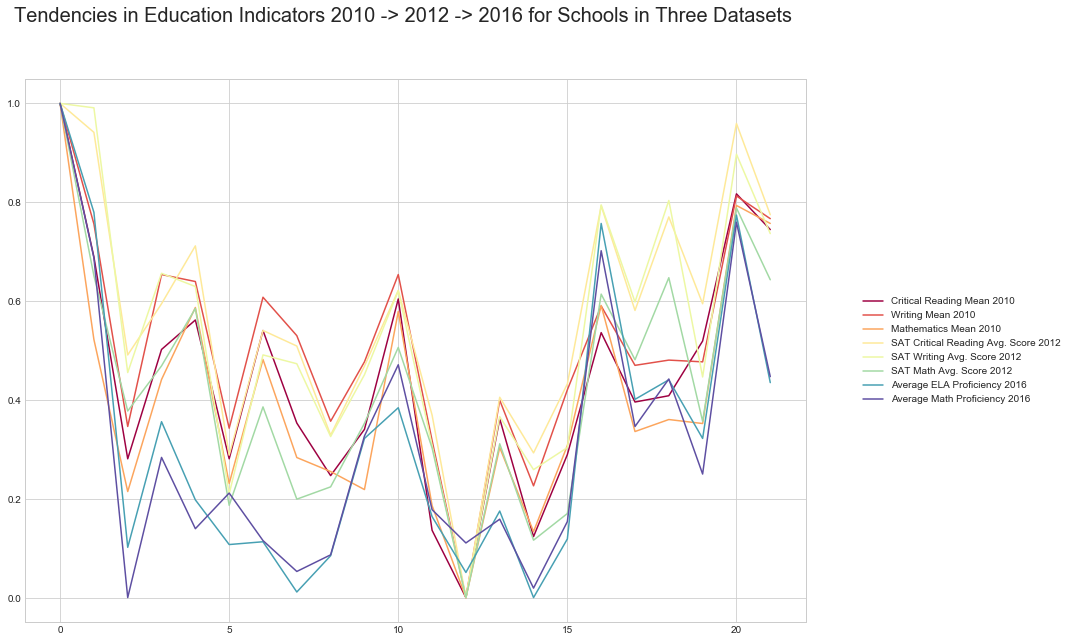

In [90]:
fig = plt.figure(figsize=(14,10)) 
ax = fig.gca()

plt.suptitle('Tendencies in Education Indicators 2010 -> 2012 -> 2016 for Schools in Three Datasets',
             fontsize=20)
tend_list = ['Critical Reading Mean 2010', 
             'Writing Mean 2010',
             'Mathematics Mean 2010',
             'SAT Critical Reading Avg. Score 2012',
             'SAT Writing Avg. Score 2012',
             'SAT Math Avg. Score 2012',
             'Average ELA Proficiency 2016',
             'Average Math Proficiency 2016']

norm_res_2010_2012_2016[tend_list].plot(ax=ax,cmap=cm.Spectral)
ax.legend(loc=10, bbox_to_anchor=(1.2,0.5));

## &#x1F310; &nbsp; Findings-4

[PASSNYC. Regression Methods](https://www.kaggle.com/olgabelitskaya/passnyc-regression-methods) is tries of detecting more deeply 

- are the guesses about biases in education reflect the real processes.

Usage the set of regression algorithms from the library [scikit-learn](http://scikit-learn.org/stable/) is very suitable in this case. 

`Gradient Boosting` algorithm has shown an ability to predict the levels of educational results based on numeric variables in this dataset. 

Other regressors have the similarity in scores.

In [91]:
features = school_explorer[numeric_list].values
targets1 = school_explorer['Average Math Proficiency'].values
targets2 = school_explorer['Average ELA Proficiency'].values

X_train1, X_test1, y_train1, y_test1 = \
train_test_split(features, targets1, test_size=0.2, random_state=1)

X_train2, X_test2, y_train2, y_test2 = \
train_test_split(features, targets2, test_size=0.2, random_state=1)

df_importance = pd.DataFrame(columns=numeric_list)

df_importance.loc[0] = GradientBoostingRegressor(max_depth=4, n_estimators=138)\
.fit(X_train1, y_train1).feature_importances_
df_importance.loc[1] = GradientBoostingRegressor(max_depth=5, n_estimators=276)\
.fit(X_train2, y_train2).feature_importances_

In [92]:
y_train_gbr1, y_test_gbr1 = \
regression(GradientBoostingRegressor(max_depth=4, n_estimators=138), 
           X_train1, X_test1, y_train1)

scores('Gradient Boosting Regressor \nAverage Math Proficiency Predictions', 
       y_train1, y_test1, y_train_gbr1, y_test_gbr1)

y_train_gbr2, y_test_gbr2 = \
regression(GradientBoostingRegressor(max_depth=5, n_estimators=276), 
           X_train2, X_test2, y_train2)

scores('Gradient Boosting Regressor \nAverage ELA Proficiency Predictions', 
       y_train2, y_test2, y_train_gbr2, y_test_gbr2)

_______________________________________
Gradient Boosting Regressor 
Average Math Proficiency Predictions
_______________________________________
EV score. Train:  0.9815852114203323
EV score. Test:  0.8926086352102638
---------
R2 score. Train:  0.9815852114203323
R2 score. Test:  0.892601349252418
---------
MSE score. Train:  0.004013459926885173
MSE score. Test:  0.0229283629372537
---------
MAE score. Train:  0.04885991734938186
MAE score. Test:  0.11524359822042288
---------
MdAE score. Train:  0.0398670038457154
MdAE score. Test:  0.09023855582011509
_______________________________________
Gradient Boosting Regressor 
Average ELA Proficiency Predictions
_______________________________________
EV score. Train:  0.9991525930620759
EV score. Test:  0.8704178026526234
---------
R2 score. Train:  0.9991525930620759
R2 score. Test:  0.8702686118037428
---------
MSE score. Train:  0.0001065563921910079
MSE score. Test:  0.018632321215603348
---------
MAE score. Train:  0.007692157878821

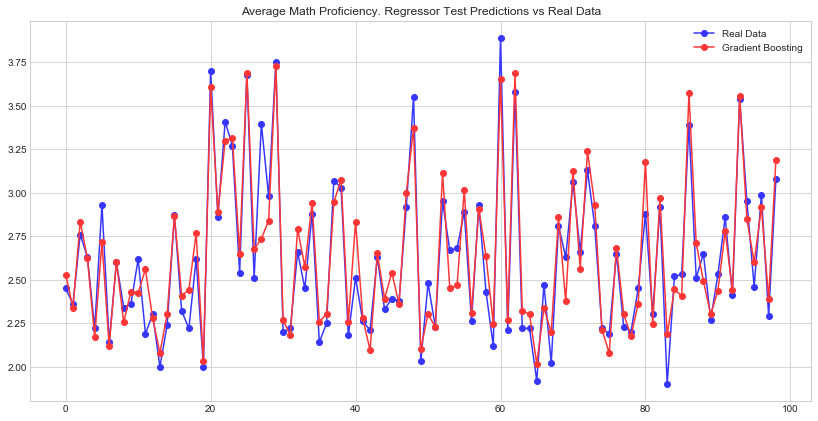

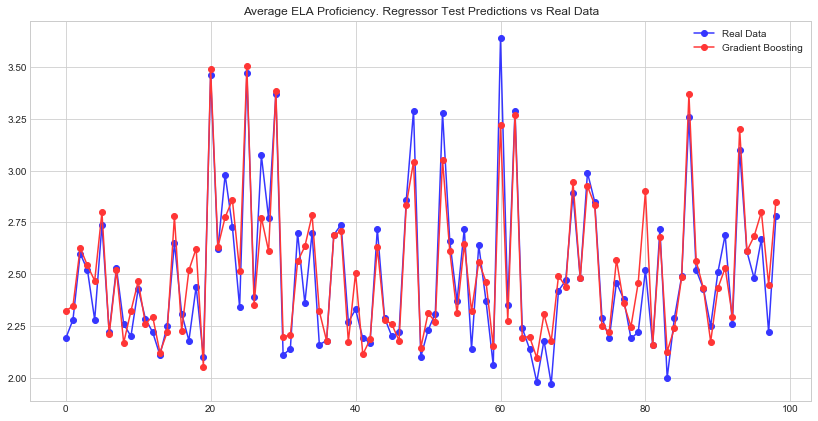

In [93]:
plt.figure(figsize = (14, 7))

plt.plot(y_test1[1:100], '-o', c='#3636ff', label='Real Data')
plt.plot(y_test_gbr1[1:100], '-o', c='#ff3636', label='Gradient Boosting')

plt.legend()
plt.title("Average Math Proficiency. Regressor Test Predictions vs Real Data")

plt.figure(figsize = (14, 7))

plt.plot(y_test2[1:100], '-o', c='#3636ff', label='Real Data')
plt.plot(y_test_gbr2[1:100], '-o', c='#ff3636', label='Gradient Boosting')

plt.legend()
plt.title("Average ELA Proficiency. Regressor Test Predictions vs Real Data");

Based on many experiments with regression algorithms the list of the most influential variables for the educational results looks like this:

- Financial: `Economic Need Index`
- Social: `Supportive Environment`
- Organizational: `Student Attendance Rate`
- Linguistical: `Percent ELL`
- Ethnical: `Percent Black / Hispanic`

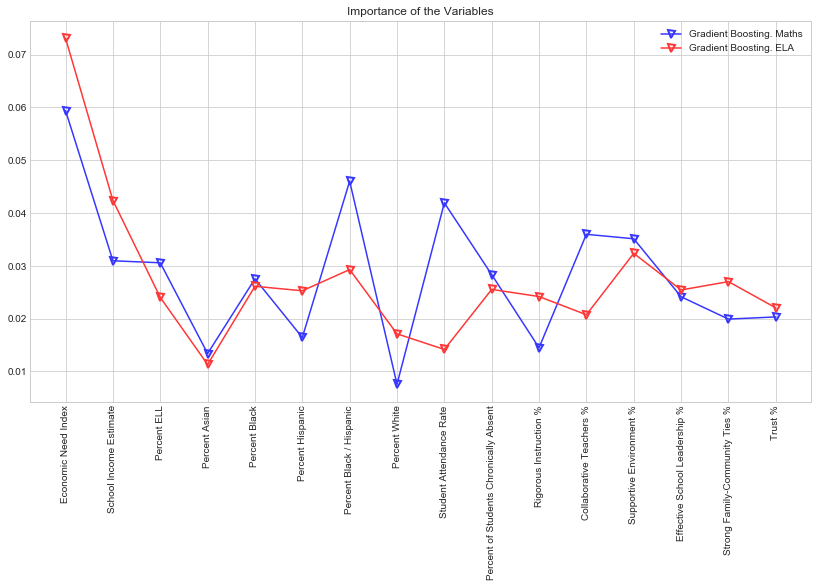

In [94]:
fig = plt.figure(figsize=(14,7)) 
ax = fig.gca()

ax.plot(df_importance.loc[0][2:18],'-v',c='#3636ff',label='Gradient Boosting. Maths',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
ax.plot(df_importance.loc[1][2:18],'-v',c='#ff3636',label='Gradient Boosting. ELA',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
ax.set_xticks(list(range(16)))
ax.set_xticklabels(list(df_importance.columns[2:18]),
                   rotation=90)
plt.title("Importance of the Variables");

## &#x1F310; &nbsp; Findings-5

[PASSNYC. Neural Networks](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks) is the fifth step in the exploration

- applying neural networks [Keras](https://keras.io/) for prediction of financial situation.

In [103]:
features = school_explorer[numeric_list+target_list]\
.drop(['Economic Need Index','School Income Estimate'], axis=1).values
targets = school_explorer['Economic Need Index'].values

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.3, random_state=1)

n = int(len(X_test)/2)
X_valid, y_valid = X_test[:n], y_test[:n]
X_test, y_test = X_test[n:], y_test[n:]

def mlp_model():
    model = Sequential()
    
    model.add(Dense(138, input_dim=138))
    model.add(LeakyReLU(alpha=0.02))
    model.add(Dense(138))
    model.add(LeakyReLU(alpha=0.02))
    
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=0.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=0.02))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_model = mlp_model()

mlp_lr_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                     patience=5, verbose=2, factor=0.2)

mlp_history = mlp_model.fit(X_train, y_train, 
                            epochs=50, batch_size=16, verbose=0,
                            validation_data=(X_valid, y_valid),
                            callbacks=[mlp_lr_reduction])


Epoch 00029: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 00046: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.


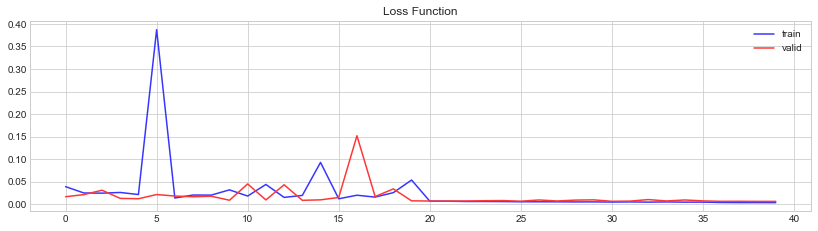

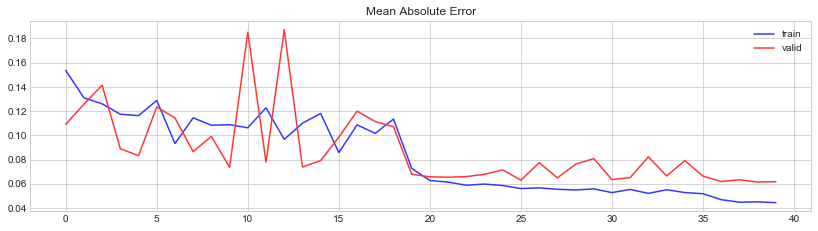

In [104]:
loss_plot(mlp_history,10)
mae_plot(mlp_history,10)

In [105]:
y_train_mlp = mlp_model.predict(X_train)
y_valid_mlp = mlp_model.predict(X_valid)
y_test_mlp = mlp_model.predict(X_test)

nn_scores('MLP; Economic Need Index', 
          y_train, y_valid, y_test, y_train_mlp, y_valid_mlp, y_test_mlp)

_______________________________________
MLP; Economic Need Index
_______________________________________
EV score. Train:  0.9189611528867858
EV score. Valid:  0.8794845019023318
EV score. Test:  0.83581901838352
---------
R2 score. Train:  0.9180021140045306
R2 score. Valid:  0.8771638279848495
R2 score. Test:  0.8342019670954053
---------
MSE score. Train:  0.0034556156817089497
MSE score. Valid:  0.006373820818998029
MSE score. Test:  0.0072325388314562955
---------
MAE score. Train:  0.043411308536275055
MAE score. Valid:  0.06173532172023313
MAE score. Test:  0.06304695770690578
---------
MdAE score. Train:  0.031083632230758607
MdAE score. Valid:  0.04937454795837404
MdAE score. Test:  0.04959657049179067


Characteristics of the educational process, social environment, ethnic composition, administrative affiliation are sufficient to predict the level of  `Economic Need Index`.

The similar experiments show that for predicting `School Income Estimate` information is not enough and can be supplemented with indicators of economic activity in general for the state and the economic situation in the district adjacent to the school.

## &#x1F310; &nbsp; Findings-6

[PASSNYC. Neural Networks 2](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks-2) is the next step in the exploration

- applying neural networks [Keras](https://keras.io/) for prediction of educational outcomes.

In [106]:
features = school_explorer[numeric_list+category_list]
targets2 = school_explorer['Average ELA Proficiency'].values

features_enc = features
encode = OneHotEncoder(sparse=False)

for column in category_list:
    encode.fit(features[[column]])
    transform = encode.transform(features[[column]])
    
    transform = \
    pd.DataFrame(transform, 
                 columns=[(column+"_"+str(i)) for i in features[column].value_counts().index])
    transform = transform.set_index(features.index.values)
    
    features_enc = pd.concat([features_enc, transform], axis=1)
    features_enc = features_enc.drop(column, 1)
    
features_enc = features_enc.values

X_train2, X_test2, y_train2, y_test2 = \
train_test_split(features_enc, targets2, test_size=0.3, random_state=1)

n = int(len(X_test2)/2)
X_valid2, y_valid2 = X_test2[:n], y_test2[:n]
X_test2, y_test2 = X_test2[n:], y_test2[n:]

In [107]:
def mlp_model2():
    model = Sequential()
    
    model.add(Dense(286, input_dim=286))
    model.add(LeakyReLU(alpha=0.02))

    model.add(Dense(286*4))
    model.add(LeakyReLU(alpha=0.02))
    
    model.add(Dense(286*16))
    model.add(LeakyReLU(alpha=0.02))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_model2 = mlp_model2()

mlp_lr_reduction2 = ReduceLROnPlateau(monitor='val_loss', 
                                      patience=5, verbose=2, factor=0.2)

mlp_history2 = mlp_model2.fit(X_train2, y_train2, 
                              epochs=150, batch_size=16, verbose=0,
                              validation_data=(X_valid2, y_valid2),
                              callbacks=[mlp_lr_reduction2])


Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 00059: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 00086: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.

Epoch 00104: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.

Epoch 00113: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.

Epoch 00118: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.

Epoch 00123: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.

Epoch 00128: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.

Epoch 00133: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.

Epoch 00138: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.

Epoch 00143: ReduceLRO

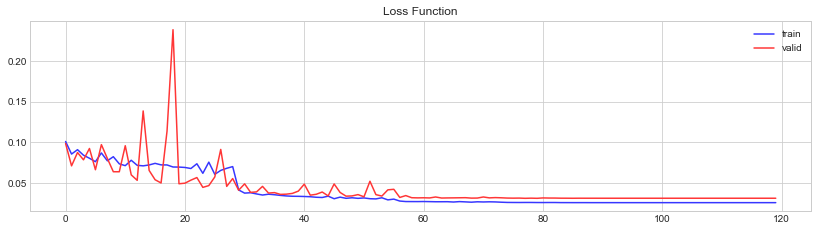

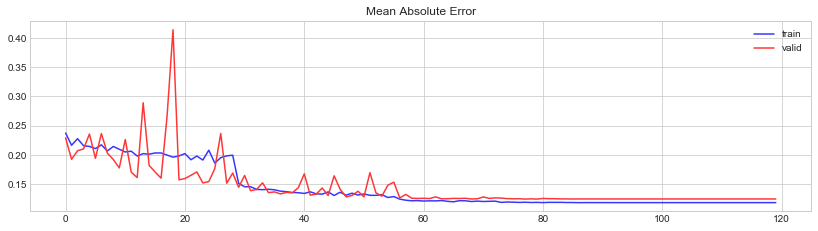

In [108]:
loss_plot(mlp_history2,30)
mae_plot(mlp_history2,30)

In [109]:
y_train_mlp2 = mlp_model2.predict(X_train2)
y_valid_mlp2 = mlp_model2.predict(X_valid2)
y_test_mlp2 = mlp_model2.predict(X_test2)

nn_scores('MLP; \nNumeric & Encoded Categorical Features; \nAverage ELA Proficiency', 
          y_train2, y_valid2, y_test2, y_train_mlp2, y_valid_mlp2, y_test_mlp2)

_______________________________________
MLP; 
Numeric & Encoded Categorical Features; 
Average ELA Proficiency
_______________________________________
EV score. Train:  0.7958764671285514
EV score. Valid:  0.7716259839531655
EV score. Test:  0.8065292032438149
---------
R2 score. Train:  0.7958551312558426
R2 score. Valid:  0.7713483707129102
R2 score. Test:  0.8023850629461156
---------
MSE score. Train:  0.026011185671381193
MSE score. Valid:  0.03143162325110754
MSE score. Test:  0.025710279100023922
---------
MAE score. Train:  0.11829775005154843
MAE score. Valid:  0.12454788604123845
MAE score. Test:  0.12792428867147024
---------
MdAE score. Train:  0.09190490722656253
MdAE score. Valid:  0.0947836685180663
MdAE score. Test:  0.11139757156372054


It is difficult to achieve high accuracy here in general since the ultimate goal depends not only on the financing, social environment and professionalism of the staff but also on the personal qualities of the students.

But the success of predictions by multilayer perceptrons (MLP) is obvious.

## &#x1F310; &nbsp; Findings-7

[PASSNYC. 32 School Districts and D5. Part 2](https://lww.kaggle.com/olgabelitskaya/passnyc-32-school-districts-and-d5-part-2) is the seventh look at the main dataset and adding other datasets

- data analyzing with safety and ethnic parameters and specifics of advanced school activity.

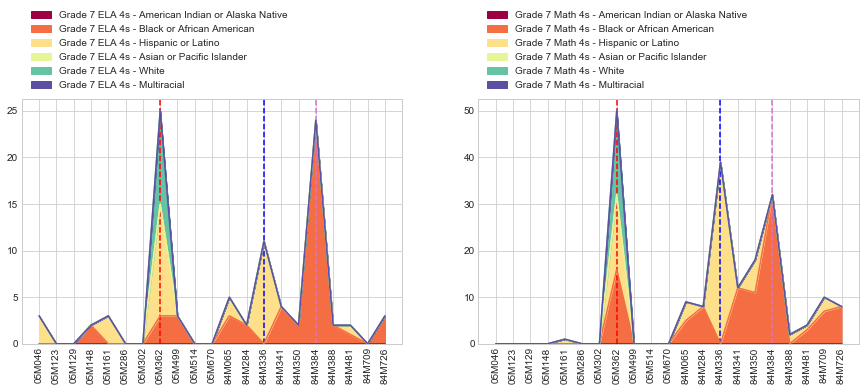

In [95]:
def district5_grade_4s(n):
    fig,ax = plt.subplots(ncols=2, figsize=(15,4.5))
    for i in [0,1]:
        col=[n+i*10,n+1+i*10,n+2+i*10,n+3+i*10,n+4+i*10,n+5+i*10]
        d5_shsat_2016[d5_shsat_2016.columns[col]].plot.area(ax=ax[i],
                                                            cmap=cm.Spectral)
        ax[i].vlines(7,0,70,linestyle="--",color='red') 
        ax[i].vlines(13,0,70,linestyle="--",color='blue')
        ax[i].vlines(16,0,70,linestyle="--",color='orchid')
        ax[i].legend(loc=3, bbox_to_anchor=(0, 1))
        ax[i].set_xticks(list(range(0,21)))
        ax[i].set_xticklabels(list(d5_shsat_2016['Location Code']),
                              rotation=90);
        
district5_grade_4s(101)

Three leaders among the schools from the 5th District have different and unique places in the ethnic environment: 

- in one case, many groups demonstrate great results, 

- in the second case, there are a lot of `Hispanic or Latino` successful students and 

- in the third case, many `Black or African American` pupils have high scores.

All these specifics can be used for the choice of a comfortable environment for concrete students: 

- are they prefer a multicultural environment or monoethnic groups. 


In [96]:
crime_list = ['Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N']
safety.rename(columns={'Location Code':'Location Code 2'}, inplace=True)
safety.rename(columns={'DBN':'Location Code'}, inplace=True)

schoolexplorer_safety = safety[crime_list+['Location Code']].dropna()
schoolexplorer_safety = \
schoolexplorer_safety.groupby(['Location Code'], as_index=False)[crime_list].sum()
schoolexplorer_safety = \
pd.merge(school_explorer, schoolexplorer_safety, on='Location Code')

d5shsat_safety = safety[crime_list+['Location Code']].dropna()
d5shsat_safety = \
d5shsat_safety.groupby(['Location Code'], as_index=False)[crime_list].sum()
d5shsat_safety = \
pd.merge(d5_shsat_2016, d5shsat_safety, on='Location Code')

districts_safety = \
schoolexplorer_safety[crime_list+['District']].dropna()
districts_safety = districts_safety.groupby(districts_safety['District'])\
.sum().sort_values('District')
districts_safety = districts_safety.append(districts_safety.loc[9]).sort_values('District')
districts_safety = districts_safety.reset_index(drop=True)
districts_safety = pd.concat([districts,districts_safety], axis=1)

schoolexplorer_safety.shape, d5shsat_safety.shape, districts_safety.shape

((719, 164), (7, 160), (33, 149))

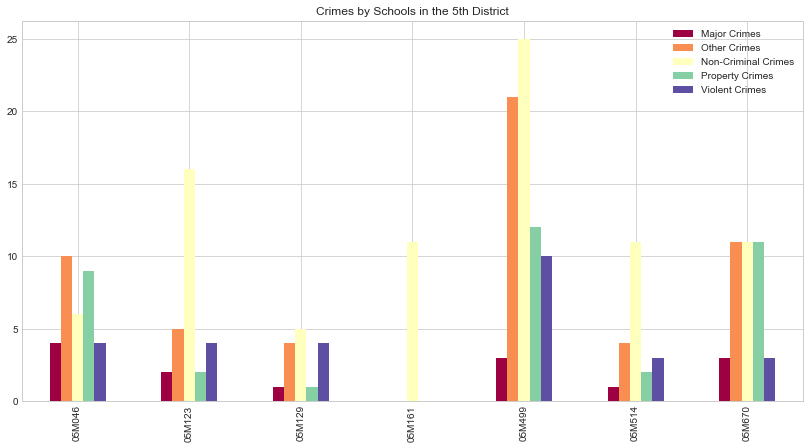

In [97]:
fig = plt.figure(figsize=(14,7)) 
ax = fig.gca() 
d5shsat_safety[crime_list].plot.bar(ax=ax,cmap=cm.Spectral)
plt.title('Crimes by Schools in the 5th District')
handles, labels = ax.get_legend_handles_labels()
labels = ['Major Crimes','Other Crimes','Non-Criminal Crimes',
          'Property Crimes','Violent Crimes']
ax.legend(handles,labels)
ax.set_xticklabels(list(d5shsat_safety['Location Code']));


In the databases obtained with the integration of educational results and incidents, there is no information about many schools in the 5th District:

- no incidents or no information about them?

It requires to increase awareness of this parameter: perhaps this is the reason for declining in the indicators of study in some cases.

In this case, it is necessary to pay attention to preventing offenses and involving adolescents in sports and additional education.

In [98]:
high_school.rename(columns={'dbn':'Location Code'}, inplace=True)

hsl = high_school[['Location Code','language_classes']].dropna()
hsl['language_classes'] = hsl['language_classes'].apply(lambda x: x.split(', '))
hsl = hsl.reset_index(drop=True)

languages = []
for i in range(len(hsl)):
    l_list = list(set(hsl['language_classes'][i]))
    for l in l_list:
        if l not in languages:
            languages.append(l)

languages = sorted(languages)
for l in languages:
    hsl[l] = 0

for i in range(len(hsl)):
    for l in languages:
        if l in hsl['language_classes'][i]:
            hsl.loc[i,l] = 1
hsl = hsl.drop(['language_classes'], axis=1)
hsl['District'] = hsl['Location Code'].apply(lambda x: int(x[:2]))
                        
districts_hsl = hsl.groupby('District').sum()
districts_hsl.reset_index(level=0, inplace=True)

hsa = high_school[['Location Code','advancedplacement_courses']].dropna()
hsa['advancedplacement_courses'] = \
hsa['advancedplacement_courses'].apply(lambda x: x.split(', '))
hsa = hsa.reset_index(drop=True)

courses = []
for i in range(len(hsa)):
    a_list = list(set(hsa['advancedplacement_courses'][i]))
    for a in a_list:
        if a not in courses:
            courses.append(a)

courses = sorted(courses)
for a in courses:
    hsa[a] = 0

for i in range(len(hsa)):
    for a in courses:
        if a in hsa['advancedplacement_courses'][i]:
            hsa.loc[i,a] = 1
            

hsa = hsa.drop(['advancedplacement_courses','Latin','Spanish'], axis=1)
hsa['District'] = hsa['Location Code'].apply(lambda x: int(x[:2]))
                        
districts_hsa = hsa.groupby('District').sum()
districts_hsa.reset_index(level=0, inplace=True)

districts_hsl.shape, districts_hsa.shape

((32, 25), (32, 25))

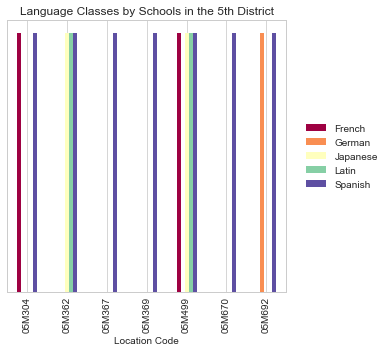

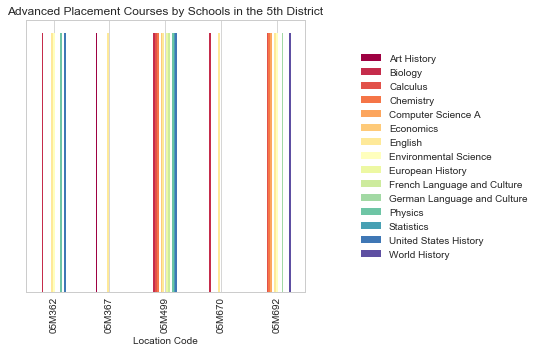

In [99]:
hsl5d = hsl[hsl['District']==5]
hsl5d = hsl5d.loc[:, (hsl5d != 0).any(axis=0)]\
.set_index(hsl5d['Location Code'])

fig = plt.figure(figsize=(5,5)) 
ax = fig.gca()
hsl5d.iloc[:,1:-1].plot.bar(ax=ax,cmap=cm.Spectral)
plt.title('Language Classes by Schools in the 5th District')
ax.legend(loc=10, bbox_to_anchor=(1.2,0.5))
ax.set_yticks([])

hsa5d = hsa[hsa['District']==5]
hsa5d = hsa5d.loc[:, (hsa5d != 0).any(axis=0)]\
.set_index(hsa5d['Location Code'])

fig = plt.figure(figsize=(5,5)) 
ax = fig.gca()
hsa5d.iloc[:,1:-1].plot.bar(ax=ax,cmap=cm.Spectral)
plt.title('Advanced Placement Courses by Schools in the 5th District')
ax.legend(loc=10, bbox_to_anchor=(1.5,0.5))
ax.set_yticks([]);

Visualization allows allocating schools paying attention to language training, additional courses, and sports activity.

One of the leaders (`05M362`) in terms of academic indicators in the 5th District is on the graph in the last two sections.

Information about the other two mentioned leaders is missing in the downloaded files, but it can easily be found on the pages of these schools on the Internet.

For students in the categories 

- `Economically Disadvantaged` and 
- `Limited English Proficient` 

in the schools with a high level of advanced activity the supporting needs especially to be an active part of all these programs.

## &#x1F310; &nbsp; Conclusion

1) Schools with a high level of results, in which it is necessary to support certain categories of students, and schools in which the situation needs to be changed in a coordinated manner are identified.

2) Indirectly confirmed by several types of algorithms the presence of ethnic and economic biases in educational results, as well as the degree of influence of individual indicators.

3) The information gathered in the main database allows to predict enough accurately the economic situation and the educational results of the school with the help of various regression algorithms (including neural networks).

Some additional information could help to reach more advanced levels of analysis and prediction in the main dataset.

1) The variable `Local Code` could include the fields `District`, `City Part`, '`City`, `School Type`, `Unique Number`.

   - For example, `05-MNY-0112P-105` can mean `5th District, Manhatten, NYC, Grades from 1 to 12 and Private or just an ID of the concrete school type, N105`.

2) Information about crime and fire incidents is needed for complete imagine about the social environment for each school.

3) Infomation about advanced school activity is needed to characterize the educational process in general.

4) The unified file form for each year helps to catch the tendencies in the time series.

5) Indexing of economic activity in districts allows predicting school incomes more accurately.